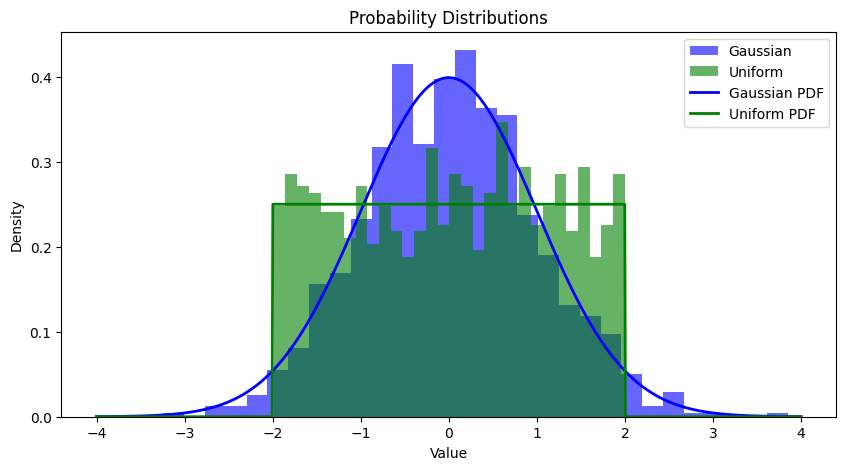

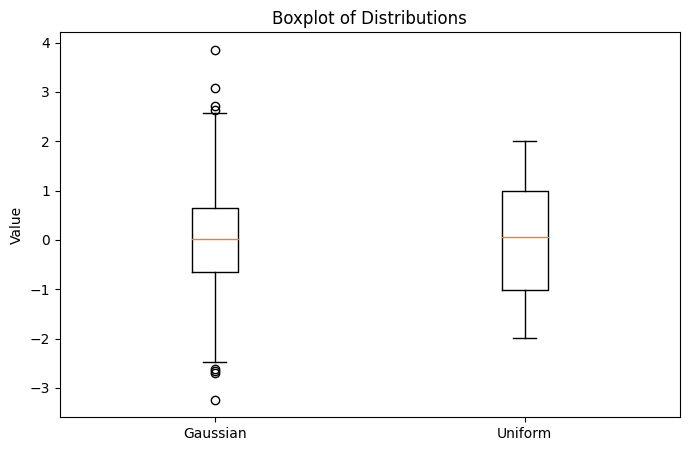

Classification Accuracy: 0.47


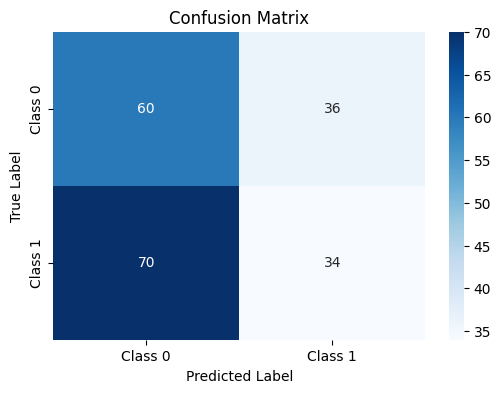

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Task 1: Generate datasets following Gaussian and Uniform distributions
np.random.seed(42)
gaussian_data = np.random.normal(loc=0, scale=1, size=1000)  # Mean=0, Std=1
uniform_data = np.random.uniform(low=-2, high=2, size=1000)  # Range [-2,2]

# Task 2: Compute and visualize probability density functions
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10, 5))
plt.hist(gaussian_data, bins=30, density=True, alpha=0.6, color='b', label='Gaussian')
plt.hist(uniform_data, bins=30, density=True, alpha=0.6, color='g', label='Uniform')
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'b-', lw=2, label='Gaussian PDF')
plt.plot(x, uniform.pdf(x, loc=-2, scale=4), 'g-', lw=2, label='Uniform PDF')
plt.legend()
plt.title("Probability Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Additional visualization: Boxplots for comparison
plt.figure(figsize=(8, 5))
plt.boxplot([gaussian_data, uniform_data], labels=["Gaussian", "Uniform"])
plt.title("Boxplot of Distributions")
plt.ylabel("Value")
plt.show()

# Task 3: Estimate class conditional probabilities using a sample dataset
X = np.vstack((gaussian_data, uniform_data)).T
y = np.array([0]*500 + [1]*500)  # Two classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 4: Implement a Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Observations
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

# Additional visualization: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
